In [1]:
# Импорт всех нужных библиотек

import pandas as pd 
from pandas import DataFrame
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns

from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve

from sklearn.metrics  import classification_report  
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score  


from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC 

from sklearn.preprocessing import Normalizer

from sklearn.datasets import make_classification

from sklearn.dummy import DummyClassifier


# Ансамбли
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier


# Линейный модели
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import SGDClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.gaussian_process import GaussianProcessClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier

from sklearn.svm import LinearSVC
from sklearn.svm import NuSVC
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier

from sklearn.gaussian_process import GaussianProcessClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis



import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.datasets import make_classification



In [2]:
# Модели

MODELS ={
    #'DummyClassifier': DummyClassifier(),
    
    'AdaBoostClassifier': AdaBoostClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'RandomForestClassifier_default': RandomForestClassifier(),
    'RandomForestClassifier_params': RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    
    'LogisticRegression': LogisticRegression(),
    'LogisticRegressionCV': LogisticRegressionCV(),
    'PassiveAggressiveClassifier': PassiveAggressiveClassifier(),
    'RidgeClassifier': RidgeClassifier(),
    'RidgeClassifierCV': RidgeClassifierCV(),
    'SGDClassifier': SGDClassifier(),
    
    'MLPClassifier': MLPClassifier(),
    
    # 'GaussianProcessClassifier': GaussianProcessClassifier(),
    
    'KNeighborsClassifier': KNeighborsClassifier(),
    'RadiusNeighborsClassifier': RadiusNeighborsClassifier(),
    
    'LinearSVC': LinearSVC(),
    'NuSVC': NuSVC(),
    'SVC': SVC(),
    
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'ExtraTreeClassifier': ExtraTreeClassifier(),
    
    'GaussianProcessClassifier': GaussianProcessClassifier(),
    
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    
    'LinearDiscriminantAnalysis': LinearDiscriminantAnalysis(),
    'QuadraticDiscriminantAnalysis': QuadraticDiscriminantAnalysis()

}

In [3]:
# Формируем данные исходных dataset

X, Y = make_classification(n_samples = 3000, n_features=300)
X = pd.DataFrame(X)
Y = pd.DataFrame(Y)

df = pd.DataFrame()

LIST_NAME_FEATURES = []
LIST_NAME_Y = []

# Фичи
for index, name in enumerate(X.columns):
    LIST_NAME_FEATURES.append(f"X{index}")
    df[f"X{index}"] = X[index]
    
# Y
for index, name in enumerate(Y.columns):
    LIST_NAME_Y.append(f"Y")
    df[f"Y"] = Y[index]

# Убираем nan
df.dropna()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X291,X292,X293,X294,X295,X296,X297,X298,X299,Y
0,-0.833715,-0.059713,0.335309,-0.974730,-0.841654,1.852721,-0.705961,-1.971906,0.202016,0.184296,...,1.502413,0.412222,-0.075524,0.223902,0.274205,0.415715,-0.599985,-1.304587,-2.774132,1
1,-0.275810,1.124346,1.549267,0.677528,1.324331,-0.820775,1.845078,-0.674491,-1.464548,-0.468788,...,-0.443428,0.724280,1.768952,1.145024,0.775345,-0.879923,0.291254,-0.819193,2.514119,1
2,0.387955,0.903770,-1.154365,1.201128,-2.708176,-1.248790,-1.104851,-1.910245,2.325045,0.132566,...,-0.215878,0.660136,-0.192481,1.083527,0.214616,-0.435041,-0.972098,2.137916,0.900635,1
3,-1.136877,0.821979,0.167749,0.107469,1.486963,-0.952085,-1.360380,0.268054,0.688296,-0.610165,...,0.996178,-1.312817,-0.700641,1.366988,1.013384,-0.703875,1.246894,-0.052056,-2.478722,0
4,1.217964,0.196984,0.529772,0.197816,0.791958,0.039262,0.152459,1.553762,0.337509,1.227309,...,0.387539,-0.074095,0.432393,-0.599696,-2.118808,2.213384,0.680090,0.494825,-0.169699,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1.075133,-0.255920,-1.036469,-0.275893,-0.476321,-0.314835,-0.882762,0.619231,-1.342816,1.180036,...,-0.379811,0.339671,-0.009594,-2.056156,0.278989,-1.373832,-0.208763,1.431086,-0.542631,1
2996,-0.072280,0.898810,1.563341,0.419205,1.170910,-0.729022,0.207427,0.540910,0.407059,0.320830,...,0.432756,2.053451,-0.258599,-0.326833,0.827689,1.234338,-0.167094,1.492528,-0.791885,0
2997,-1.090896,1.143751,-0.823059,0.159191,0.263572,-1.232017,0.045819,0.525129,1.707128,-0.315056,...,1.609726,0.536863,0.878395,-0.273163,0.693581,-1.766539,0.030766,-0.103282,-0.688002,1
2998,1.047330,-0.806229,-1.099473,-1.359373,1.709767,-0.982627,0.546173,0.525552,0.869776,-0.393150,...,0.368007,1.231185,0.295251,0.270774,0.615555,0.679398,0.857667,0.907869,0.293574,1


In [4]:
# df.corr()

In [5]:
# Функция для проверки на корреляцию
def valid_corr(df, max_corr=0.8):
    
    # Матрица корреляции элментов
    matrix_corr = df.corr()

    # Список для хранения параметров, которые буде удалять
    corr_list = []

    # Добавим в наш список все элеементы корреляция коорых между собой нас не устраивет
    for i in range(1, len(matrix_corr)):
        for j in range(i + 1, len(matrix_corr) - 1):
            #print(f'{f"X{i}"} - {f"X{j}"} >>> {abs(matrix_corr[f"X{i}"][f"X{j}"])}')
            # Если значение корреляции больше, чем допуспимое значение
            if abs(matrix_corr[f"X{i}"][f"X{j}"]) > max_corr:
                
                # Смотрим какой из параметров меньше коррелирует с 'y' и добавляем его в список для дальнейшего удаления
                if matrix_corr[f"X{i}"]["Y"] > matrix_corr[f"X{j}"]["Y"]:
                    corr_list.append(f"X{j}")
                else:
                    corr_list.append(f"X{i}")

#    # Проверим значения, которые никак не коррелируют с 'y'
#    for i in range(1, len(matrix_corr["Y"])):
#        if isnan(matrix_corr["Y"][f"X{i}"]) ==  True: corr_list.append(f"X{i}" + str(i))

    corr_list = list(set(corr_list)) 
    print (corr_list)
    temp = df.drop (corr_list, axis = 1)
    return (temp)
valid_corr(df, max_corr=0.8)

['X184', 'X13']


,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X291,X292,X293,X294,X295,X296,X297,X298,X299,Y
0,-0.833715,-0.059713,0.335309,-0.974730,-0.841654,1.852721,-0.705961,-1.971906,0.202016,0.184296,...,1.502413,0.412222,-0.075524,0.223902,0.274205,0.415715,-0.599985,-1.304587,-2.774132,1
1,-0.275810,1.124346,1.549267,0.677528,1.324331,-0.820775,1.845078,-0.674491,-1.464548,-0.468788,...,-0.443428,0.724280,1.768952,1.145024,0.775345,-0.879923,0.291254,-0.819193,2.514119,1
2,0.387955,0.903770,-1.154365,1.201128,-2.708176,-1.248790,-1.104851,-1.910245,2.325045,0.132566,...,-0.215878,0.660136,-0.192481,1.083527,0.214616,-0.435041,-0.972098,2.137916,0.900635,1
3,-1.136877,0.821979,0.167749,0.107469,1.486963,-0.952085,-1.360380,0.268054,0.688296,-0.610165,...,0.996178,-1.312817,-0.700641,1.366988,1.013384,-0.703875,1.246894,-0.052056,-2.478722,0
4,1.217964,0.196984,0.529772,0.197816,0.791958,0.039262,0.152459,1.553762,0.337509,1.227309,...,0.387539,-0.074095,0.432393,-0.599696,-2.118808,2.213384,0.680090,0.494825,-0.169699,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1.075133,-0.255920,-1.036469,-0.275893,-0.476321,-0.314835,-0.882762,0.619231,-1.342816,1.180036,...,-0.379811,0.339671,-0.009594,-2.056156,0.278989,-1.373832,-0.208763,1.431086,-0.542631,1
2996,-0.072280,0.898810,1.563341,0.419205,1.170910,-0.729022,0.207427,0.540910,0.407059,0.320830,...,0.432756,2.053451,-0.258599,-0.326833,0.827689,1.234338,-0.167094,1.492528,-0.791885,0
2997,-1.090896,1.143751,-0.823059,0.159191,0.263572,-1.232017,0.045819,0.525129,1.707128,-0.315056,...,1.609726,0.536863,0.878395,-0.273163,0.693581,-1.766539,0.030766,-0.103282,-0.688002,1
2998,1.047330,-0.806229,-1.099473,-1.359373,1.709767,-0.982627,0.546173,0.525552,0.869776,-0.393150,...,0.368007,1.231185,0.295251,0.270774,0.615555,0.679398,0.857667,0.907869,0.293574,1


In [6]:

X = df[LIST_NAME_FEATURES]
Y = df[LIST_NAME_Y]

#X = pd.DataFrame(X)
X = pd.DataFrame(Normalizer().fit(X).transform(X))

# Нормализация
X = pd.DataFrame(Normalizer().fit(X).transform(X))

# Стандартизация
#X = pd.DataFrame(StandardScaler().fit(X).transform(X))

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Columns: 300 entries, 0 to 299
dtypes: float64(300)
memory usage: 6.9 MB


In [8]:
X.corr()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,1.000000,0.017599,0.006779,-0.030423,0.019760,-0.018561,-0.002857,-0.006286,-0.031841,0.016283,...,-0.013703,0.016028,-0.010474,0.001677,0.000561,0.005117,-0.014651,0.000317,-0.007413,-0.005402
1,0.017599,1.000000,-0.004085,-0.006114,-0.013076,-0.013763,0.003931,-0.028521,-0.034540,-0.029789,...,-0.023342,0.030524,-0.005706,-0.003656,-0.022111,-0.008082,0.001063,-0.009752,-0.004344,-0.011168
2,0.006779,-0.004085,1.000000,-0.006522,-0.000867,0.019998,-0.031289,-0.006056,-0.006677,-0.009578,...,-0.020853,-0.035683,0.015925,0.012895,-0.012606,0.031160,-0.008356,0.003938,0.047602,0.051126
3,-0.030423,-0.006114,-0.006522,1.000000,0.018611,0.017084,-0.002702,0.000543,-0.020758,-0.001577,...,-0.007194,-0.009817,0.006939,0.013916,-0.018710,-0.014764,-0.013920,-0.009440,-0.005392,0.019992
4,0.019760,-0.013076,-0.000867,0.018611,1.000000,0.007163,0.038801,0.005932,0.027716,-0.029001,...,0.018542,0.031089,-0.006569,-0.002962,0.050259,-0.007506,0.028128,0.016604,0.008420,-0.001392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.005117,-0.008082,0.031160,-0.014764,-0.007506,-0.014407,-0.041227,0.019554,-0.005689,-0.012587,...,-0.017376,-0.033363,-0.010817,-0.017530,-0.017032,1.000000,0.026155,0.014860,0.004940,-0.004815
296,-0.014651,0.001063,-0.008356,-0.013920,0.028128,-0.023166,-0.006205,0.026208,-0.007522,0.007831,...,0.019738,0.009899,0.003935,-0.031915,0.022085,0.026155,1.000000,-0.001292,0.009654,-0.013598
297,0.000317,-0.009752,0.003938,-0.009440,0.016604,0.026066,0.018721,0.006274,-0.005497,0.012468,...,-0.012031,0.012170,-0.003357,-0.009033,0.005942,0.014860,-0.001292,1.000000,-0.022669,0.017218
298,-0.007413,-0.004344,0.047602,-0.005392,0.008420,0.006157,-0.023935,-0.014070,-0.023042,-0.003614,...,0.004912,0.002824,0.002700,0.003319,-0.012036,0.004940,0.009654,-0.022669,1.000000,-0.035780


In [9]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.000980,-0.000474,-0.001069,0.000339,-0.001022,-0.000108,0.002424,-0.001011,0.001836,-0.001034,...,-0.000987,0.000508,-0.001570,-0.000691,0.001934,-0.001315,-0.000647,-0.000408,-0.000567,-0.001085
std,0.058240,0.058397,0.056389,0.057126,0.058310,0.058130,0.058254,0.058736,0.058583,0.057197,...,0.074288,0.056232,0.056843,0.058198,0.057843,0.056706,0.059887,0.056979,0.058670,0.058443
min,-0.212305,-0.189858,-0.241993,-0.165972,-0.223318,-0.182358,-0.195210,-0.188125,-0.226954,-0.187129,...,-0.202729,-0.207104,-0.221628,-0.192856,-0.176561,-0.211669,-0.201630,-0.176582,-0.189029,-0.175842
25%,-0.038062,-0.038565,-0.038958,-0.038102,-0.039830,-0.040371,-0.037930,-0.039471,-0.038478,-0.040436,...,-0.059143,-0.036588,-0.039163,-0.040044,-0.037809,-0.039687,-0.040679,-0.039992,-0.037312,-0.041606
50%,0.000709,-0.001708,-0.001123,-0.000339,-0.001351,-0.000330,0.001109,-0.000340,0.000368,-0.000317,...,-0.013350,-0.000060,0.000104,-0.000597,0.001931,-0.002059,0.000333,0.000358,-0.000975,-0.000518
75%,0.039970,0.039487,0.037853,0.039080,0.038387,0.040281,0.042003,0.037021,0.041950,0.037666,...,0.058046,0.038393,0.037721,0.038417,0.039873,0.037240,0.039550,0.038173,0.037639,0.039657
max,0.202665,0.235068,0.191314,0.187242,0.206798,0.196022,0.226549,0.199384,0.192011,0.175934,...,0.273039,0.186108,0.237360,0.195017,0.199443,0.211935,0.192817,0.159957,0.180927,0.177493


In [10]:
print (len(X), '<->', len(Y))

3000 <-> 3000


In [11]:
def get_data(X, Y, size_, random_state_):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=size_, random_state=random_state_) 
    return X_train, X_test, y_train, y_test

In [12]:
#X_train.head()

In [13]:
prediction_list = []

# Здесь будем хранить результаты
TestModels = DataFrame()
tmp = {}

X_train, X_test, y_train, y_test = get_data(X, Y, 0.40, 0)
#for name, clf in zip(names, classifiers):
for model_name in MODELS.keys():
    try:
        #ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        model = MODELS[model_name]
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)

        prediction = model.predict(X_test)
        
        accuracy = accuracy_score(prediction, y_test)
        print(f"{model_name}: {accuracy}")
        if abs(accuracy) < 2:
            tmp['Model'] = model_name
            # tmp['R2_Y'] =  r2_score(y_test, prediction)
            tmp['ACCU'] =  accuracy_score(y_test, prediction)
            TestModels = TestModels.append([tmp])
            # try:
            #     fpr, tpr, thresholds = roc_curve(y_test, prediction, pos_label=1)
            #     tmp['fpr'] = fpr
            #     tmp['tpr'] = tpr
            #     tmp['thresholds'] = thresholds
            # except:
            #     print ('error roc')
            # Записываем данные и итоговый DataFrame


    except Exception as e:
        print (f"{name}error: {e}")
    
    
TestModels.set_index('Model', inplace=True)    
# print_list(prediction_list)
[print(item) for item in prediction_list]

D:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier: 0.9683333333333334


D:\Program Files\Anaconda\lib\site-packages\sklearn\ensemble\_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier: 0.9683333333333334


D:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


ExtraTreesClassifier: 0.9541666666666667


D:\Program Files\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier: 0.9716666666666667


D:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


RandomForestClassifier_default: 0.97
RandomForestClassifier_params: 0.5275
LogisticRegression: 0.9491666666666667


D:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]
D:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV: 0.95
PassiveAggressiveClassifier: 0.9158333333333334
RidgeClassifier: 0.9516666666666667
RidgeClassifierCV: 0.9475
SGDClassifier: 0.9408333333333333


D:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:940: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:1853: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_s

MLPClassifier: 0.92


D:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]


KNeighborsClassifier: 0.6358333333333334


D:\Program Files\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:404: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  SupervisedIntegerMixin.fit(self, X, y)


0error: No neighbors found for test samples array([   0,    1,    2, ..., 1197, 1198, 1199], dtype=int64), you can try using larger radius, giving a label for outliers, or considering removing them from your dataset.
LinearSVC: 0.9458333333333333


D:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


NuSVC: 0.9491666666666667


D:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC: 0.9466666666666667
DecisionTreeClassifier: 0.9508333333333333
ExtraTreeClassifier: 0.6358333333333334


D:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianProcessClassifier: 0.945
GaussianNB: 0.965
0error: Negative values in data passed to MultinomialNB (input X)
LinearDiscriminantAnalysis: 0.9466666666666667


D:\Program Files\Anaconda\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), f

QuadraticDiscriminantAnalysis: 0.6683333333333333


[]

In [14]:
TestModels.sort_values(by=['ACCU']).head(-1)

,ACCU
Model,
RandomForestClassifier_params,0.527500
ExtraTreeClassifier,0.635833
KNeighborsClassifier,0.635833
QuadraticDiscriminantAnalysis,0.668333
PassiveAggressiveClassifier,0.915833
MLPClassifier,0.920000
SGDClassifier,0.940833
GaussianProcessClassifier,0.945000
LinearSVC,0.945833


In [15]:
# Найти максимальное значение

# ??? 
name_beast_model = ''
for index, row in TestModels.iterrows():
    if row['ACCU'] == TestModels['ACCU'].values.max():
        name_beast_model = index
#print ('R^2:', TestModels['R2_Y'].values.max())
print ('Точность:', TestModels['ACCU'].values.max())
print ('Лучшая модель:', name_beast_model)

Точность: 0.9716666666666667
Лучшая модель: GradientBoostingClassifier


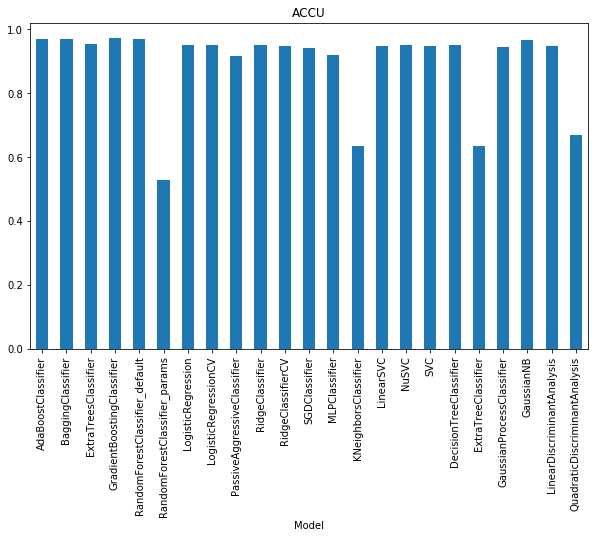

In [16]:
from pylab import *
TestModels.ACCU.plot(figsize=(10,6), kind='bar', title='ACCU')

In [17]:
# (DataFrame, Колонка для сортировки, число моделей для извлечения)
def get_beast_model(models_df, col, reange_model=1, accuracy=None):
    res_list = []
    if accuracy:
        sort_models_df = models_df.sort_values(by=[col])
        for index, row in sort_models_df.iterrows():
            if row[col] >= accuracy:
                res_list.append(index)
        return res_list
    else:
        temp = models_df.sort_values(by=[col])[-(reange_model):]
        #print (temp.head(len(classifiers)))
        for index, row in temp.iterrows():
            res_list.append(index)
        return res_list

In [18]:
accuracy = 0.90
# Получить наименование всех моделей, точность которых выше 95%
beast_models_name = get_beast_model(TestModels, 'ACCU', accuracy=accuracy)
print(f"Модели точность которых выше {accuracy * 100} %")
for name_ in beast_models_name:
    prediction = MODELS[name_].predict(X_test)
    accuracy = accuracy_score(prediction, y_test)
    print(f"Name model >>> {name_}:{accuracy}")

Модели точность которых выше 90.0 %
Name model >>> PassiveAggressiveClassifier:0.9158333333333334
Name model >>> MLPClassifier:0.92
Name model >>> SGDClassifier:0.9408333333333333
Name model >>> GaussianProcessClassifier:0.945
Name model >>> LinearSVC:0.9458333333333333
Name model >>> LinearDiscriminantAnalysis:0.9466666666666667
Name model >>> SVC:0.9466666666666667
Name model >>> RidgeClassifierCV:0.9475
Name model >>> NuSVC:0.9491666666666667
Name model >>> LogisticRegression:0.9491666666666667
Name model >>> LogisticRegressionCV:0.95
Name model >>> DecisionTreeClassifier:0.9508333333333333
Name model >>> RidgeClassifier:0.9516666666666667
Name model >>> ExtraTreesClassifier:0.9541666666666667
Name model >>> GaussianNB:0.965
Name model >>> BaggingClassifier:0.9683333333333334
Name model >>> AdaBoostClassifier:0.9683333333333334
Name model >>> RandomForestClassifier_default:0.97
Name model >>> GradientBoostingClassifier:0.9716666666666667


In [19]:
reange_model = 5
# Получить наименование 5-ти лучших моделей
beast_models_name = get_beast_model(TestModels, 'ACCU', reange_model=reange_model)
print(f"5 лучшых моделей")
for name_ in beast_models_name:
    prediction = MODELS[name_].predict(X_test)
    accuracy = accuracy_score(prediction, y_test)
    print(f"name beast model >>> {name_}:{accuracy}")

5 лучшых моделей
name beast model >>> GaussianNB:0.965
name beast model >>> BaggingClassifier:0.9683333333333334
name beast model >>> AdaBoostClassifier:0.9683333333333334
name beast model >>> RandomForestClassifier_default:0.97
name beast model >>> GradientBoostingClassifier:0.9716666666666667


In [20]:
# Формируем список предсказаний по каждой модели
predict_list = []
for model_name in beast_models_name:
    prediction = MODELS[model_name].predict(X_test)
    predict_list.append(prediction)

In [21]:
# Методом мажоритарного голосования рассчитываем результирующее предсказание
res_prediction = []
# redict_list)
for i in range(len(predict_list[0])):
    prediction = 0
    for j in range(len(predict_list)):
        prediction += predict_list[j][i]
    predict = round(prediction / len(predict_list), 0)
    res_prediction.append(predict)
    
res_prediction = np.array(res_prediction)
print(f"Точность: {accuracy_score(res_prediction, y_test)}")

Точность: 0.9741666666666666
